# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting

You may need to install packages as follows:

`python -m pip install matplotlib numpy scipy pandas scikit-learn`

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [12]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

<Axes: title={'center': 'Tail Length vs Age'}, xlabel='age', ylabel='tailL'>

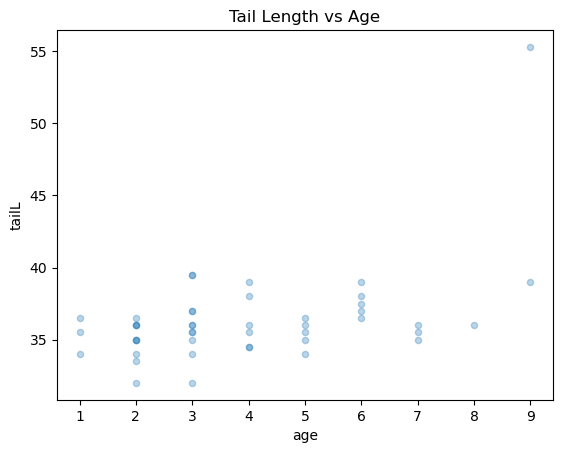

In [13]:
# Read in the data with pandas
df = pd.read_csv('possum.csv')

# Make the scatter plot (don't forget the axis labels)
df.plot.scatter(x='age', y='tailL', alpha = 0.3, title="Tail Length vs Age")

### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [14]:
def linearModelPredict(b,X):
    # calculate prediction
    yp = np.dot(X, b.T)
    return yp

# Always important: Test the new function you have written! 
X = np.array([[1,0], [1,-1], [1,2]])
b = np.array([0.1, 0.3])

# calculate prediction for sample X, b
yp = linearModelPredict(b=b, X=X)
# print result
print(yp)

# By the way: What happens when b is a 2d-array? 
# Question: What is the dimensionality of the numpy-array that you get back?
# Answer: The dimensionality is 3 since the given X has three data points.

[ 0.1 -0.2  0.7]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [15]:
def linearModelLossRSS(beta,X,y):
    # calculate y prediction
    yp = linearModelPredict(b=beta, X=X)
    
    # calculate residuals
    residuals = y-yp
    
    # calculate loss
    residual_sum_of_squares = np.sum(residuals**2)
    
    # calculate gradient
    gradient = -2 * np.dot(X.T, residuals)
    
    return (residual_sum_of_squares, gradient)

X = np.array([[1,0], [1,-1], [1,2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

residual_sum_of_squares, gradient = linearModelLossRSS(beta=b, X=X, y=y)

print('Loss: {}'.format(residual_sum_of_squares))
print('Gradient: {}'.format(gradient))

# Question: To minimize the cost do you need increase or decrease the value of the parameters?
# Answer: All gradient of loss with respect to the parameters are negative so therefore to minimize the loss function, the value of the parameters should be increased.

Loss: 2.06
Gradient: [-3.6 -4. ]


### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [16]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    # initial beta
    b0 = np.zeros(shape=(X.shape[1]))    
    
    # minimize loss function
    result = so.minimize(lossfcn, b0, args=(X,y), jac=True)
    
    # estimate beta, set the parameters
    estimated_betas = result.x
    
    # calculate R-squared
    yp = linearModelPredict(b=estimated_betas, X=X)
    RSS = np.sum((y-yp)**2)
    TSS = np.sum((y-y.mean())**2)
    R2 = 1-(RSS/TSS)

    print('All Results:\n {}'.format(result))  

    return (estimated_betas, R2)

X = np.array([[1,0], [1,-1], [1,2]])
y = np.array([0, 0.4, 2])

estimated_betas, R2 = linearModelFit(X,y,lossfcn = linearModelLossRSS)
print('Best parameters: {}'.format(estimated_betas))
print('R-squared: {}'.format(R2))

All Results:
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.56
        x: [ 6.000e-01  6.000e-01]
      nit: 4
      jac: [-4.441e-16 -6.661e-16]
 hess_inv: [[ 1.786e-01 -3.571e-02]
            [-3.571e-02  1.071e-01]]
     nfev: 6
     njev: 6
Best parameters: [0.6 0.6]
R-squared: 0.75


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally spaced ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


All Results:
   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 388.10162450066554
        x: [ 3.335e+01  7.537e-01]
      nit: 5
      jac: [-3.273e-07 -1.040e-07]
 hess_inv: [[ 5.083e-02 -1.010e-02]
            [-1.010e-02  2.553e-03]]
     nfev: 6
     njev: 6
Best Parameters: [33.35046603  0.75372837]
R-squared: 0.2228658794760413


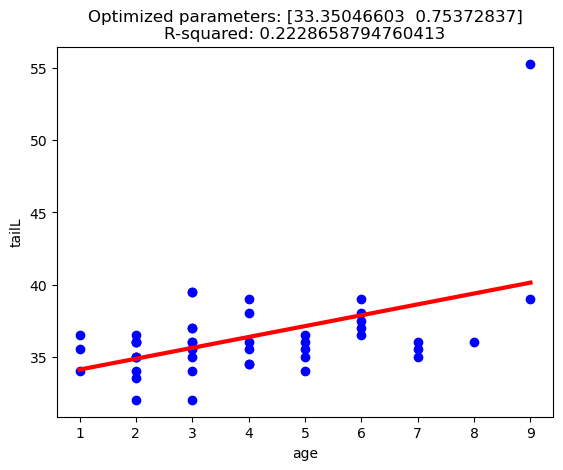

In [17]:
# Make the design matrix using np.c_ 
# y = ...
# X =  np.c_[...]

# get age from dataframe
X_age = df['age'].to_numpy()
# Create a new X matrix with equally space data
X_age_reshape = np.reshape(X_age,newshape=(-1,1))
X = np.concatenate((np.ones(shape=(X_age_reshape.shape[0], 1)),  X_age_reshape), axis=1)

# get y = tailL from dataframe
y = df['tailL'].to_numpy()

# optimize parameter of model
estimated_betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossRSS)
print('Best Parameters: {}'.format(estimated_betas))
print('R-squared: {}'.format(R2))

# Call your fitting function
# fitted line
X_fitted_line = np.linspace(start=X_age.min(), stop=X_age.max(), num=100)
# Add 1
X_fitted_line_reshape = np.reshape(X_fitted_line, newshape=(-1, 1))
X_fitted_line_expanded = np.concatenate((np.ones(shape=(X_fitted_line_reshape.shape[0], 1)),  X_fitted_line_reshape), axis=1)
y_fitted_line = linearModelPredict(b=estimated_betas, X=X_fitted_line_expanded)

# Create the scatter plot (see question 1.1)
# Add the line to the graph 
# Report R2 
plt.figure()
plt.scatter(X_age, y, c='b')
plt.plot(X_fitted_line, y_fitted_line, 'r-', linewidth=3)
plt.xlabel('age')
plt.ylabel('tailL')
plt.title('Optimized parameters: {}\nR-squared: {}'.format(estimated_betas, R2))
plt.show()

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [18]:
def linearModelLossLAD(b,X,y):
    # calculate y prediction
    yp = linearModelPredict(b=b, X=X)
    
    # calculate residuals
    residuals = y-yp
    
    # calculate loss
    sum_abs_dev = np.sum(np.abs(residuals))
    
    # calulate gradient
    grad = -1 * np.dot(X.T, np.sign(residuals))

    return (sum_abs_dev, grad)

X = np.array([[1,0], [1,-1], [1,2]])
b = np.array([0.1, 0.3])
y = np.array([0, 0.4, 2])

sum_abs_dev, grad = linearModelLossLAD(b=b, X=X, y=y)
print('Loss: {}'.format(sum_abs_dev))
print('Gradients: {}'.format(grad))

Loss: 2.0
Gradients: [-1. -1.]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



All Results:
   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 73.96670873167427
        x: [ 3.450e+01  3.334e-01]
      nit: 10
      jac: [-0.000e+00  2.000e+00]
 hess_inv: [[ 6.821e-03 -1.147e-03]
            [-1.147e-03  2.531e-04]]
     nfev: 131
     njev: 119
Best Parameters: [34.4999369   0.33335437]
R-squared: 0.12923024435209518


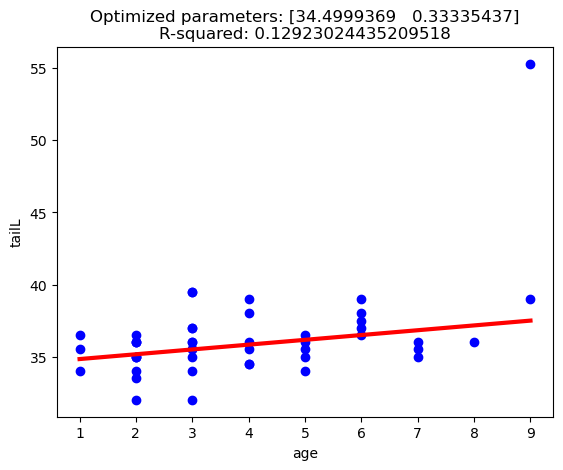

In [19]:
# get age from dataframe
X_age = df['age'].to_numpy()
X_age_reshape = np.reshape(X_age, newshape=(-1, 1))
# add one to it
X = np.concatenate((np.ones(shape=(X_age_reshape.shape[0], 1)),  X_age_reshape), axis=1)

# get y from dataframe
y = df['tailL'].to_numpy()

# optimize parameter of the model
estimated_betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)
print('Best Parameters: {}'.format(estimated_betas))
print('R-squared: {}'.format(R2))

# fitted line
X_fitted_line = np.linspace(start=X_age.min(), stop=X_age.max(), num=100)
# Add 1
X_fitted_line_reshape = np.reshape(X_fitted_line, newshape=(-1, 1))
X_fitted_line_expanded = np.concatenate((np.ones(shape=(X_fitted_line_reshape.shape[0], 1)),  X_fitted_line_reshape), axis=1)
y_fitted_line = linearModelPredict(b=estimated_betas, X=X_fitted_line_expanded)

plt.figure()
plt.scatter(X_age, y, c='b')
plt.plot(X_fitted_line, y_fitted_line, 'r-', linewidth=3)
plt.xlabel('age')
plt.ylabel('tailL')
plt.title('Optimized parameters: {}\nR-squared: {}'.format(estimated_betas, R2))
plt.show()

Written answer: 

The R-Twos from LAD and RRS are similar. The value for LAD is 0.1293 and for RSS is 0.2229. RSS method has a slightly better R-squared value. The reason is that there are no data that can be considered as outlier and LAD gives less weight to extreme values since it uses the absolute values function.

### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [20]:
# use age for regression
# all data as numpy
X = df.loc[:, ['age']].to_numpy()
y = df.loc[:, 'tailL'].to_numpy()

reg = linear_model.LinearRegression().fit(X, y)
r_squared = reg.score(X, y)

print('Use "age" for regression) R-squared: {}'.format(r_squared))

Use "age" for regression) R-squared: 0.22286587947604108


Written answer:

Sklearn R-squared with "age": 0.22286587947604108

OLS R-squared with "age": 0.2228658794760413

Therefore, when using sklearn with "age", we obtain almost equal R-squared values to our implementation OLS, which show both method are close to being the same.